# Rudiments of Frequency Analysis

Christophe@pallier.org - Jan 2017 

(Note: I am reusing some code from http://tinyurl.com/fourierpython)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show
import numpy as np
from numpy import pi, sin, cos
import scipy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

## The concepts of Amplitude, Frequency and Phase for a sinewave

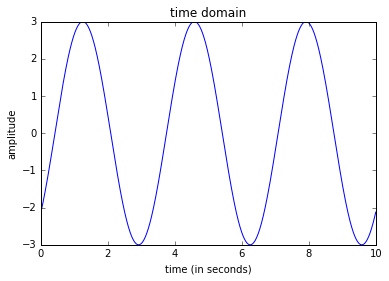

In [4]:
freq =  .3 #hz - cycles per second
phase = pi / 4.0
amplitude = 3


time_to_plot = 10 # second
sample_rate = 100 # samples per second
num_samples = sample_rate * time_to_plot

time = np.linspace(0, time_to_plot, num_samples)
signal = amplitude*sin((2*pi*freq*time) - phase)

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plot(time, signal)

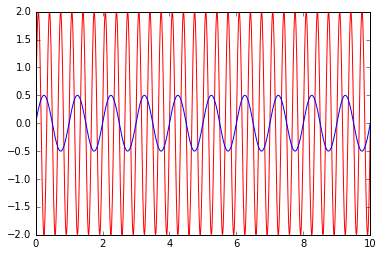

In [4]:
freq1 = 3; amp1 = 2; phase1 = 0
freq2 = 1; amp2 = 0.5; phase2 = 0

y1 = amp1*sin((2*pi*freq1*time) - phase1)
y2 = amp2*sin((2*pi*freq2*time) - phase2)

plot(time, y1, 'r', time, y2, 'b')

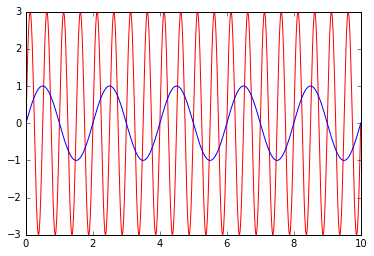

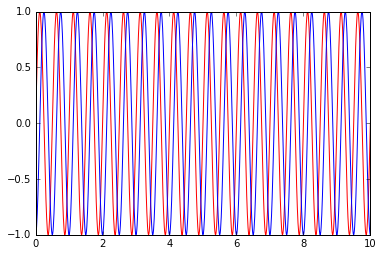

In [5]:
# Now using diffent sets of parameters:

params = ((3, 2, 0, 1, 0.5, 0),
        (1, 2, 0, 1, 2, pi/2))

for amp1, freq1, phase1, amp2, freq2, phase2 in params:
    y1 = amp1*sin((2*pi*freq1*time) - phase1)
    y2 = amp2*sin((2*pi*freq2*time) - phase2)
    plot(time, y1, 'r', time, y2, 'b')
    show()

## Summing sinewaves

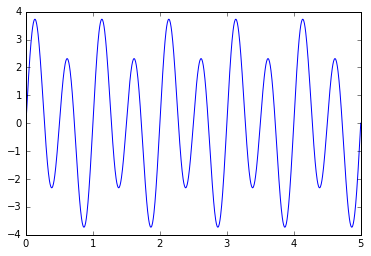

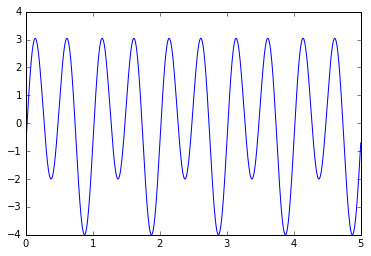

In [15]:
params = ((3, 2, 0, 1, 1, 0),
        (3, 2, 0, 1, 1, pi/4))

for a1, f1, p1, a2, f2, p2 in params:
    y1 = a1*sin((2*pi*f1*time) - p1)
    y2 = a2*sin((2*pi*f2*time) - p2)
    plot(time, y1 + y2)
    show()


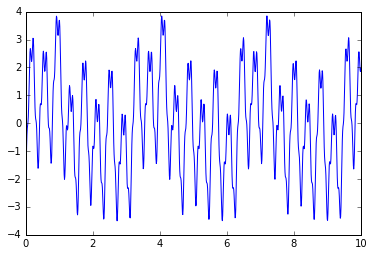

In [7]:
# summing more than 2 sine waves (6 here)

# Note; you can modify the following parameters and run the cell again:
f = (1,2,4,8,16,32)
a = (1,0.5,0.8,2,0.3,0.5)
p = (0,1,0,1,0,0)

y = np.zeros(len(time))
for i in range(len(f)):
    y = y + a[i] * sin(2*f[i]*time-p[i])

plot(time, y)
show()

# Decomposition

According to Fourier' theorem, any periodic signal can be expressed  as the finite sum of sinewaves of varying amplitudes, phases and frequencies (frequencies which are multiples of the original frequency of the signal (1/period).  

## Creating basis functions

The Fourier basis comprises sines and cosines

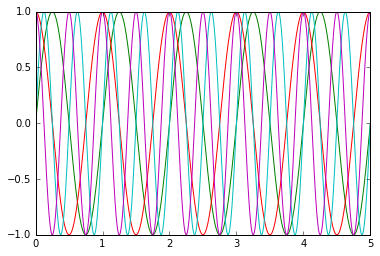

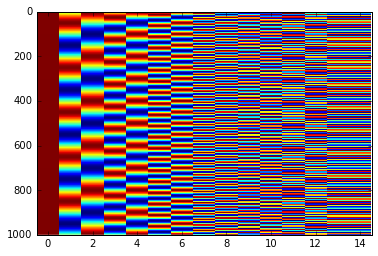

In [8]:
time = np.linspace(0, 5, 1000)
s0 = np.ones(len(time))
s1 = sin(2*pi*time); c1 = cos(2*pi*time)
s2 = sin(2*pi*2*time); c2 = cos(2*pi*2*time)
s3 = sin(2*pi*4*time); c3 = cos(2*pi*4*time)
s4 = sin(2*pi*8*time); c4 = cos(2*pi*8*time)
s5 = sin(2*pi*16*time); c5 = cos(2*pi*16*time)
s6 = sin(2*pi*32*time); c6 = cos(2*pi*32*time)
s7 = sin(2*pi*64*time); c7 = s7 = sin(2*pi*64*time)

X = np.column_stack((s0, s1, c1, s2, c2, s3, c3, s4, c4, s5, c5, s6, c6, s7, c7))

plt.plot(time, X[:,:5])
show()

plt.imshow(X, aspect='auto', interpolation='none')
show()

## Decomposing a signal on the basis functions using multiple linear regression

Let us first generate a "sawtooth" signal

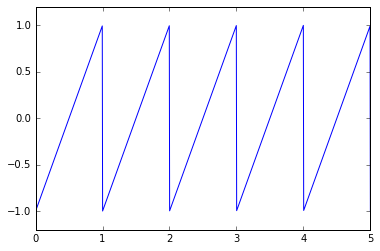

In [9]:
from scipy import signal
y = signal.sawtooth(2 * pi * time)
plot(time, y)
axes = plt.gca()
axes.set_ylim([-1.2, 1.2])
show()



Let us now decompose this signal on the sinewave basis functions, using multiple linear regression (projection)

In [10]:
coeff = np.linalg.lstsq(X,y)[0]  # least square estimates
coeff

array([ -1.97628458e-03,  -6.35902481e-01,  -3.49075768e-03,
        -3.18263795e-01,  -1.95312500e-03,  -1.58813477e-01,
        -4.08008809e-03,  -7.95591338e-02,  -4.22151865e-03,
        -3.97084691e-02,  -4.07893990e-03,  -1.98399520e-02,
        -4.41487130e-03,   7.17544180e+12,  -7.17544180e+12])

The coefficients can be used to reconstruct a fitted signal that approximates the the original signal 

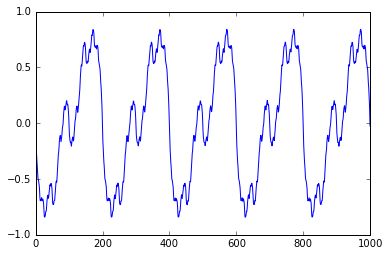

In [11]:
reconstructed_signal = X.dot(coeff)
plot(reconstructed_signal)
show()

In [12]:
#Computing and plotting the power spectrum 

The discrete Fourier transform allows to get the coeffcients without explicitly creating the basis functions, making it easy to obtain a power spectrum, or periodogram of the signal. 

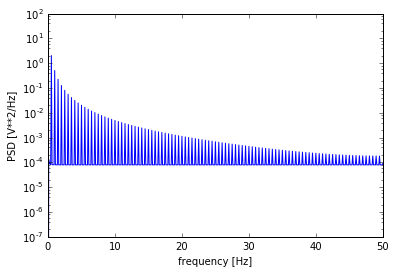

In [13]:
f, Pxx_den = signal.periodogram(y, sample_rate)
    
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')


A spectrogram shows a series a spectra computed over successive time-windows


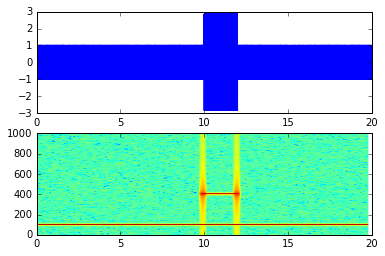

In [14]:
# example taken from matplotlib docs

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2*np.pi*100*t)
s2 = 2*np.sin(2*np.pi*400*t)

# create a transient "chirp"
mask = np.where(np.logical_and(t > 10, t < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01*rand(size(s2));

x = s1 + s2 + nse;  # the signal
NFFT = 1024;       # the length of the windowing segments
Fs = int(1.0/dt);  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

plt.plot(t, x)

Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
plt.show()